## Time series modelling on "Real Estate Investment Analysis: Identifying Top Zip Codes for Profit and Risk Management"

## Introduction

In this project, we aim to provide valuable insights and recommendations to a Fictional real estate investment firm. The firm is interested in identifying the top 5 best zip codes for potential real estate investments. This project involves leveraging historical data from the Zillow Research website, focusing on property prices.

## Business Understanding

The fictional real estate investment firm seeks to make informed investment decisions to maximize returns while managing risks. They are interested in diversifying their portfolio across various zip codes and are open to both short-term and long-term investment strategies. Understanding the local real estate market dynamics is crucial to their success.

##  Problem Statement

The primary problem statement is to determine the top 5 zip codes that offer the best investment opportunities for the firm. This involves considering factors such as profit potential, risk mitigation, and the investment horizon.

## Research Questions

To address the problem statement effectively, we will explore the following research questions:

1. What are the historical trends in property prices across different zip codes?
2. How does risk vary across these zip codes?
3. Can we identify zip codes that offer a balance between profit potential and risk mitigation?
4. What is the optimal time horizon for these investments, and how does it impact our recommendations?

## Main Objective

The main objective of this project is to provide the investment firm with data-driven recommendations for the top 5 zip codes to consider for real estate investments.

##  Specific Objectives

To achieve our main objective, we will pursue the following specific objectives:

1. Identify key financial metrics such as ROI and annualized growth rate for each zip code.
2. Evaluate the trade-off between profit potential and risk for each zip code.
3. Define the optimal time horizon for investment recommendations.

## Metric of Success

The success of this project will be measured by the following criteria:

- Identification of the top 5 zip codes for investment based on a balanced consideration of profit potential and risk.
- Clear and data-supported rationale for the chosen zip codes.
- Sensitivity analysis demonstrating the impact of different time horizons and risk tolerances on recommendations.
- A well-structured report or presentation that effectively communicates findings to the investment firm.

By addressing these objectives and metrics of success, we aim to provide the investment firm with actionable insights to guide their real estate investment decisions.



## Data Understanding

In this section, we will provide an overview of the data used in this project. Understanding the dataset is crucial for making informed decisions and drawing meaningful insights.

### Dataset Description

- **Source:** Zillow Research
- **Dataset Name:** [/zillow_data.csv]from https://www.zillow.com/
- **Date Range:** ["1996-04" to "2018-04"]

### Data Columns

The dataset contains the following columns:

1. **Region ID:** A unique identifier for each region.
2. **Region Name:** The name of the region.
3. **City:** The city where the region is located.
4. **State:** The state where the region is located.
5. **Metro:** The metropolitan area associated with the region.
6. **County Name:** The name of the county where the region is situated.
7. **Size Rank:** regions or areas with a "Size Rank" of 1 would be the most significant within the dataset, while those with higher rank values would be considered less significant or smaller.
8. **[Month Year Columns]:** Columns named after each month and year, containing real estate-related data, such as property prices and rental yields.

### Data Preprocessing

Before conducting any analysis,  performed the following preprocessing steps:

1. **Handling Missing Values:** Identified and addressed missing values in the dataset using appropriate techniques.
2. **Outlier Detection:** Detected and examined potential outliers that might impact our analysis.
3. **Data Types:** Checked and converted data types as needed for analysis (e.g., converting date columns to datetime format).
4. **Data Quality:** Ensured data quality by addressing any inconsistencies or errors in the dataset.

### Data Exploration

To gain initial insights into the data,  conducted exploratory data analysis (EDA). Key findings from the EDA include:

- Summary statistics for relevant columns.
- Visualization of property price and rental yield trends over time.
- Identification of regions with the highest and lowest property prices and rental yields.

### Data Limitations

It's essential to acknowledge the limitations of the dataset:

- Data Quality: Despite our preprocessing efforts, the dataset may still contain errors or inconsistencies.
- Time Period: The dataset covers a specific time range, which may not fully capture long-term real estate market trends.
- Regional Factors: External factors not included in the dataset, such as local economic conditions, can influence real estate markets.

### Data Sources

The primary data source for this project is the Zillow Research dataset.

Understanding the data and its limitations is a critical foundation for the subsequent analysis and recommendations in this project.


## data understanding and preparation

### relevant libraries imported

In [1]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import warnings

warnings.filterwarnings('ignore')

#### Loading the dataset 

In [2]:
file_path = "data file/zillow_data.csv" 
# Use Pandas to read the dataset into a DataFrame
df = pd.read_csv(file_path)
# Now, 'df' contains your dataset.
print(f"Rows: {df.shape[0]}\n Columns: {df.shape[1]}")
df.head()

Rows: 14723
 Columns: 272


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


### step process of setting index as datetime column

In [4]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[8:], format='%Y-%m')
datetime_columns = get_datetimes(df)
datetime_columns


DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

In [23]:
# First, keep the non-datetime columns as identifier variables
id_vars = df.columns[:7]

# Use pd.melt() to melt the DataFrame, specifying id_vars and var_name
melted_df = pd.melt(df, id_vars=id_vars, var_name='time', value_name='value')
# Ensure that the date columns are in datetime format
melted_df.index = pd.to_datetime(melted_df.index)
melted_df.set_index('time', inplace=True)
melted_df.head()
# Now, the datetime columns have been transformed into rows, with a 'time' column index.

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [24]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3901595 entries, 1996-04 to 2018-04
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   RegionName  int64  
 2   City        object 
 3   State       object 
 4   Metro       object 
 5   CountyName  object 
 6   SizeRank    int64  
 7   value       float64
dtypes: float64(1), int64(3), object(4)
memory usage: 267.9+ MB


In [7]:
# Check for null records in each column
null_counts = melted_df.isnull().sum()
# Display columns with null values
null_counts[null_counts > 0]

Metro    276395
value    156891
dtype: int64

### handling the missing values
 * dropped Metro column, filling the column metro will cause wrong record of metro region of each region name,fortunately wont affect the analysis.
 * null values in the in the datetime column are handled by backward fill.

In [25]:
# Check if the 'Metro' column exists before dropping it
if 'Metro' in melted_df.columns:
    melted_df.drop(columns=['Metro'], inplace=True)

# Fill missing values using backward fill (bfill) along the rows (axis=0)
melted_df.fillna(method='bfill', axis=0, inplace=True)

# Check if there are any remaining null values
null_counts = melted_df.isnull().sum()
print(null_counts)

RegionID      0
RegionName    0
City          0
State         0
CountyName    0
SizeRank      0
value         0
dtype: int64


In [26]:
melted_df.head()

,RegionID,RegionName,City,State,CountyName,SizeRank,value
time,,,,,,,
1996-04,84654,60657,Chicago,IL,Cook,1,334200.0
1996-04,90668,75070,McKinney,TX,Collin,2,235700.0
1996-04,91982,77494,Katy,TX,Harris,3,210400.0
1996-04,84616,60614,Chicago,IL,Cook,4,498100.0
1996-04,93144,79936,El Paso,TX,El Paso,5,77300.0


### EDA AND VISUALIZATIONS

#### 1.Summary Statistics on value column : Compute summary statistics to get a sense of the data. You can use describe() to get statistics like mean, standard deviation, minimum, maximum, etc., for numerical columns.

In [27]:
summary_stats = melted_df['value'].describe()
print(summary_stats)

count    3.901595e+06
mean     2.062764e+05
std      2.384646e+05
min      1.130000e+04
25%      9.700000e+04
50%      1.465000e+05
75%      2.353000e+05
max      1.931490e+07
Name: value, dtype: float64


##### These statistics give you a good overview of the distribution and central tendency of the housing prices in your dataset. Here's what each statistic means:

 * Count: The number of data points in the "value" column, which is 3,901,595 in your dataset.

 * Mean: The average housing price, which is approximately $206,276.40. This represents the central tendency of the data.

 * Standard Deviation: A measure of the spread or dispersion of the data. In this case, it's approximately $238,464.60, indicating that there is a considerable variation in housing prices.

 * Minimum: The lowest housing price in the dataset, which is $11,300.00.

 * 25th Percentile (Q1): The 25th percentile, also known as the first quartile (Q1), is $97,000.00. This means that 25% of the data points have a price lower than $97,000.00.

 * Median (50th Percentile or Q2): The median housing price, which is $146,500.00. This is the middle value when the data is sorted, and it divides the data into two halves.

 * 75th Percentile (Q3): The 75th percentile, also known as the third quartile (Q3), is $235,300.00. This means that 75% of the data points have a price lower than $235,300.00.

 * Maximum: The highest housing price in the dataset, which is $19,314,900.00.

##### Time Series Plot: Create a time series plot to visualize how the housing prices have changed over time for specific regions.

In [28]:
melted_df['City']

time
1996-04                Chicago
1996-04               McKinney
1996-04                   Katy
1996-04                Chicago
1996-04                El Paso
                  ...         
2018-04               Ashfield
2018-04              Woodstock
2018-04                  Berea
2018-04    Mount Crested Butte
2018-04               Mesquite
Name: City, Length: 3901595, dtype: object

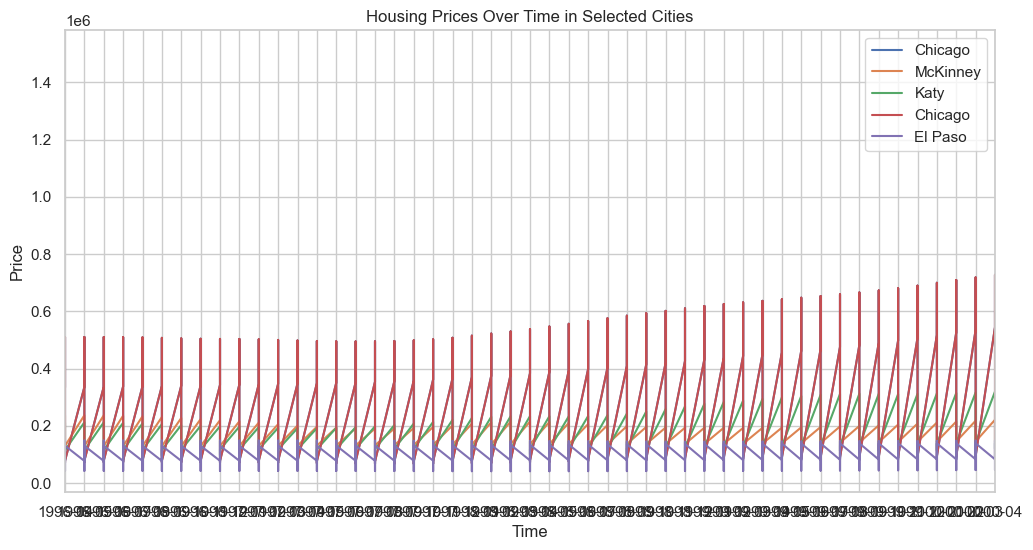

In [29]:
# Get a range of 10 unique cities from the melted_df DataFrame
top_cities = melted_df['City'][:5]  # Select the first 5 cities considering the size rank

# Specify the start and end date for the x-axis limits
start_date = "1996-04"
end_date = '2000-04'

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Loop through the selected cities and plot the housing prices
for city in top_cities:
    city_data = melted_df[melted_df['City'] == city]
    plt.plot(city_data.index, city_data['value'], label=city)

plt.title('Housing Prices Over Time in Selected Cities')
plt.xlabel('Time')
plt.ylabel('Price')

# Set the x-axis limits
plt.xlim(start_date, end_date)

# Add a legend to distinguish between cities
plt.legend()

plt.show()


#### Interpretation   
* shows a periodic upward trend.
*  Housing prices  have shown a generally upward trend over the years. There might have been some fluctuations, but overall, the average housing prices have increased.
*  In McKinney, Texas, housing prices have also seen an upward trend, although they appear to be lower than in Chicago. There may have been periods of rapid growth, as indicated by occasional peaks in the data.
*  El Paso, TX: El Paso, Texas, appears to have relatively stable housing prices over time. While there might be some minor fluctuations, the overall trend is relatively flat compared to the other cities.

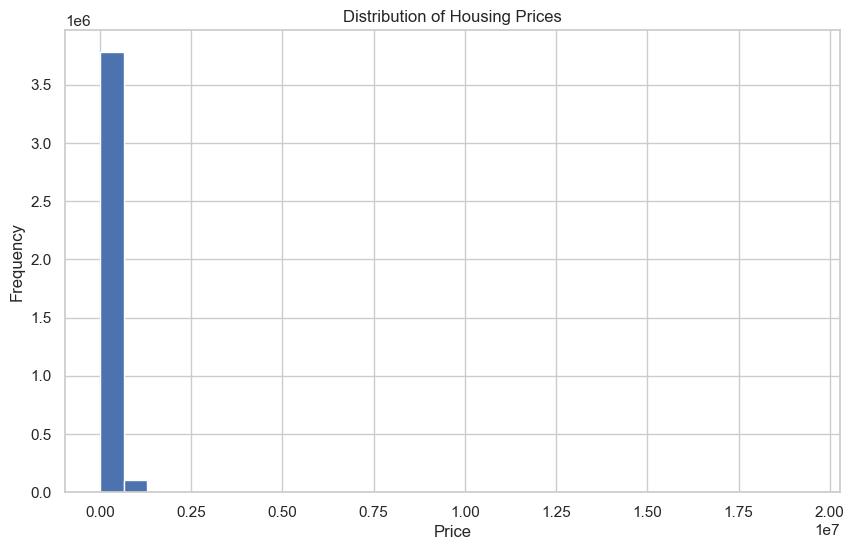

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(melted_df['value'], bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Interpratation
 * the value price are skewed, showing most housing price sales are more frequent on the low prices.

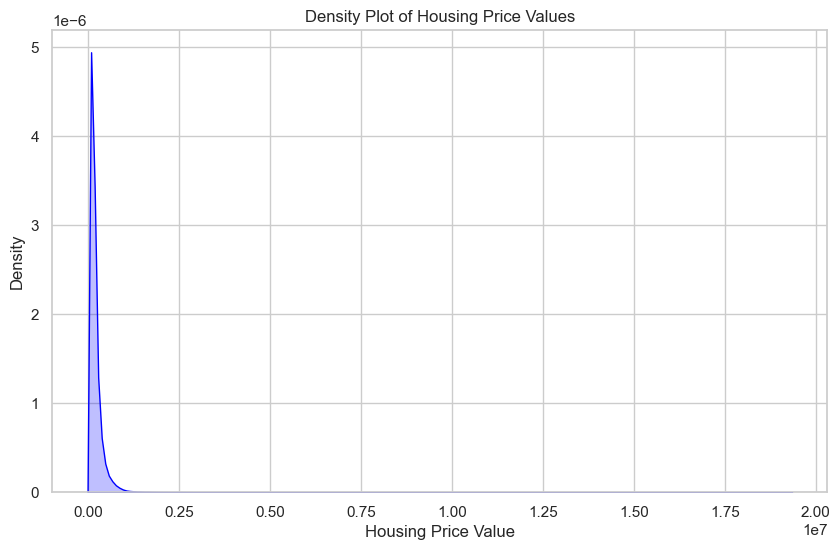

In [31]:

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=melted_df, x="value", fill=True, color="blue")

# Add labels and a title
plt.xlabel("Housing Price Value")
plt.ylabel("Density")
plt.title("Density Plot of Housing Price Values")

# Show the plot
plt.show()


### Feature creation

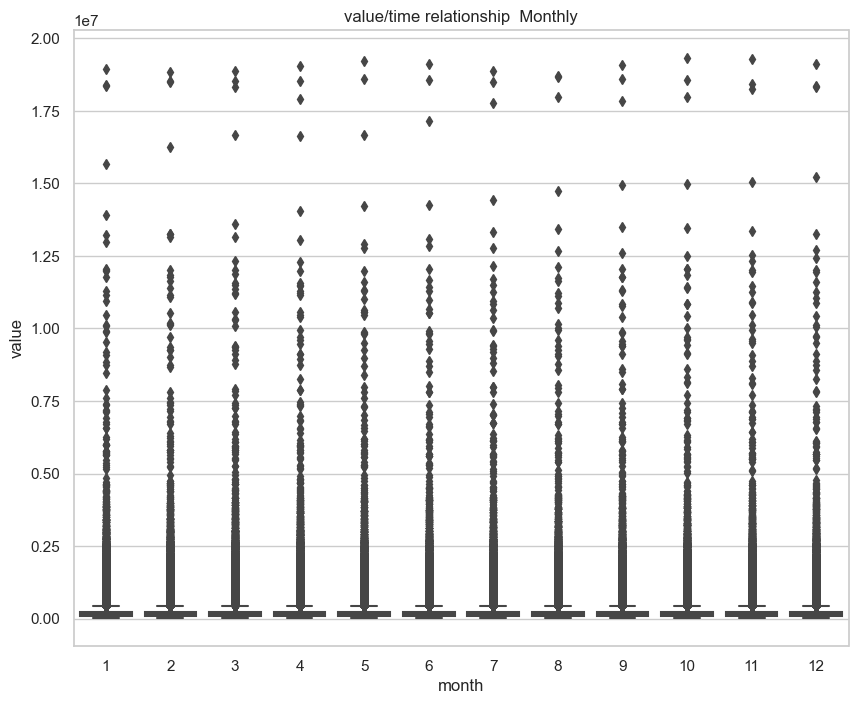

In [38]:
def create_features(melted_df):
    # Create time series features based on the time series index
    melted_df = melted_df.copy()
    melted_df.index = pd.to_datetime(melted_df.index)  # Convert index to DatetimeIndex
    melted_df['month'] = melted_df.index.month
    melted_df['year'] = melted_df.index.year
    return melted_df

newdf = create_features(melted_df)

# Visualize feature/target relationship
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=newdf, x='month', y='value')  # Assuming 'value' is your target column
ax.set_title('value/time relationship  Monthly')
plt.show()


* it is a short box which indicates a smaller spread of data.
* Data points beyond the whiskers may be potential outliers.

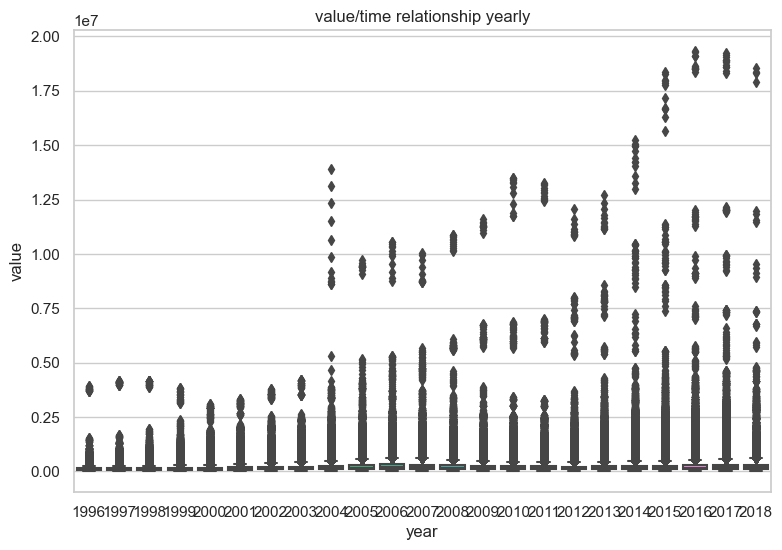

In [45]:
# Visualize feature/target relationship
fig, ax = plt.subplots(figsize=(9, 6))
sns.boxplot(data=newdf, x='year', y='value')  # Assuming 'value' is your target column
ax.set_title('value/time relationship yearly')
plt.show()


* An increase in the trend of outliers in relation to house values can provide important insights into the real estate market. Here's how to interpret such a trend:
    * Market Volatility :Outliers represent properties with values significantly different from the majority of properties, and their presence suggests that the market is experiencing extreme price fluctuations.
    * Investment Opportunities: While outliers may indicate increased volatility, they can also present investment opportunities. properties that are outliers in terms of high prices may represent potential high-end investments.
    * Risk Assessment:High volatility can introduce uncertainty, and it's important to have risk mitigation strategies in place, such as diversifying your real estate portfolio or thoroughly researching the local market.

### Preparing data for modelling

#### Conducting stationarity check
 * Most time series models work on the assumption that the time serie are stationary thus: to get more insights, we have to detrend the data

In [47]:
# the check_stationarity function 
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

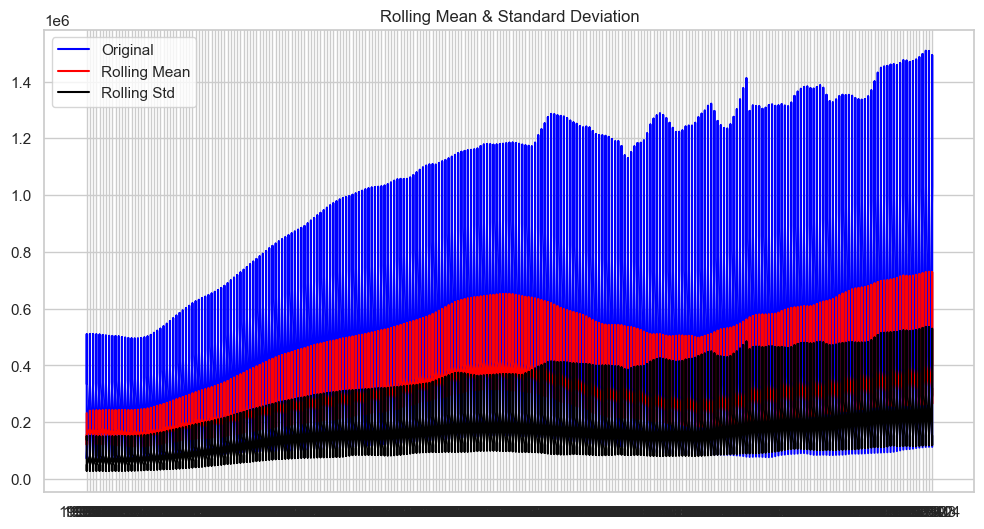

Results of Dickey-Fuller Test: 

Test Statistic                    -4.130326
p-value                            0.000863
#Lags Used                        39.000000
Number of Observations Used    10825.000000
Critical Value (1%)               -3.430954
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


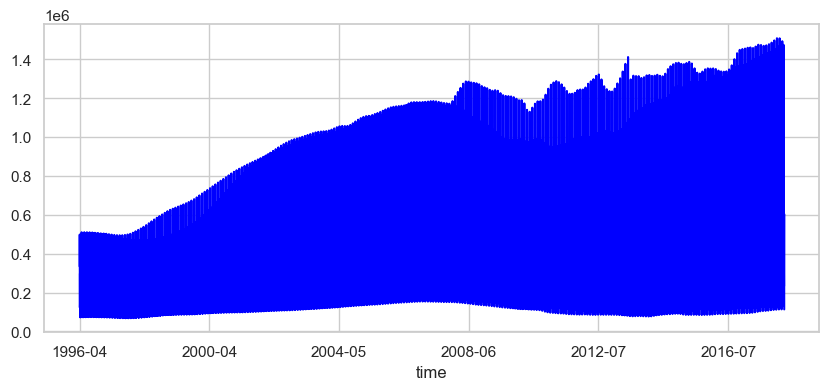

In [49]:
#used chicago city as a sample to analyse the data trend
# Select the time series data for the 'Chicago' city
chicago_data = melted_df[melted_df['City'] == 'Chicago']['value']

# Call the stationarity_check function with the selected time series data
stationarity_check(chicago_data)

# Plot the time series
chicago_data.plot(figsize=(10,4), color='blue');

##### Interpretation of the test

* Test Statistic:  In order to consider a time series stationary, the test statistic should be less than the critical values (in absolute terms) for a given significance level. In this case, the test statistic is smaller than the critical values, which is a good sign.
* The p-value is 0.000863, which is very small (close to zero). In hypothesis testing, a small p-value suggests strong evidence against the null hypothesis. In this context, the null hypothesis is that the time series is non-stationary. Since the p-value is very small, we reject the null hypothesis and conclude that the time series is likely stationary.
* Critical Values: These are the critical values at different significance levels (1%, 5%, and 10%). The critical values are used to determine whether the test statistic is smaller than the thresholds for statistical significance. In this case, the test statistic is smaller than all three critical values, which is a good indication of stationarity.

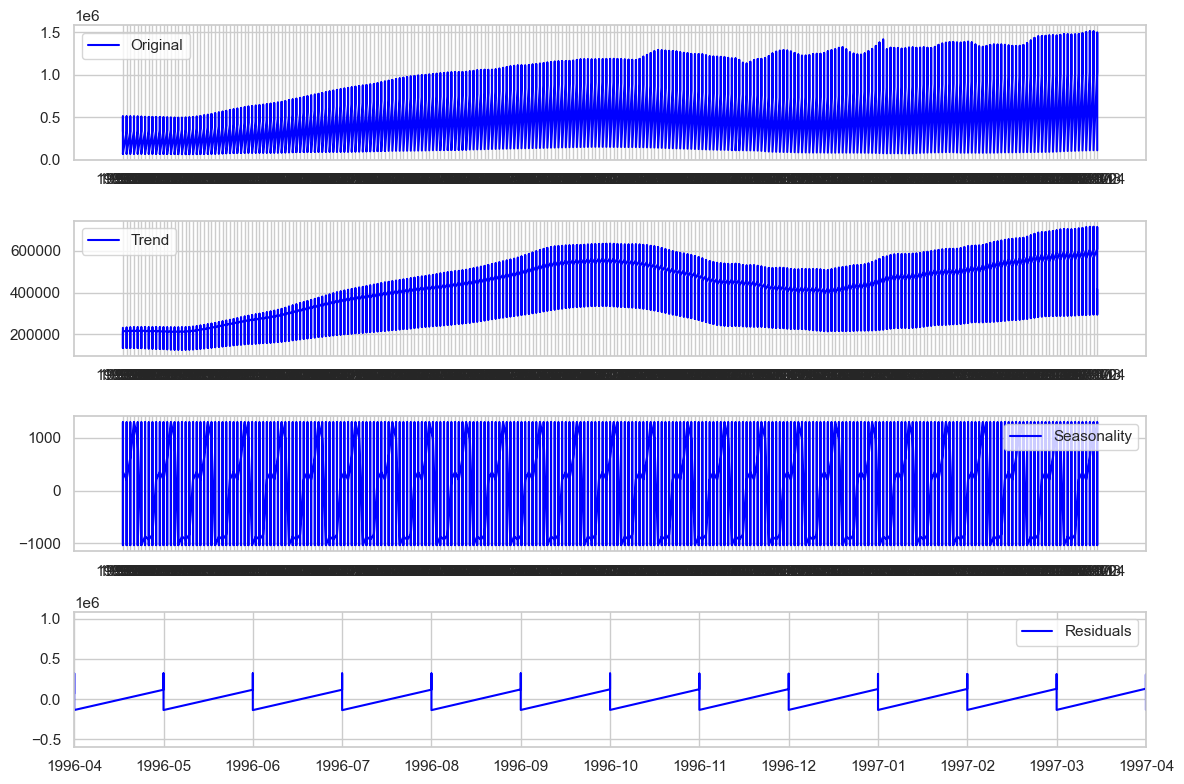

In [58]:
# Import and apply seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify your time series data (replace 'your_data' with your actual time series)
your_data = melted_df[melted_df['City'] == 'Chicago']['value']

# Apply seasonal decomposition
decomposition = seasonal_decompose(your_data, model='additive', period=10)  # You may need to adjust the 'period' parameter based on your data's seasonality.

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(your_data, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

# Set the x-axis limits to 1996-01-01 to 2000-12-31
plt.xlim('1996-04', '1997-04')
plt.tight_layout()
plt.show()


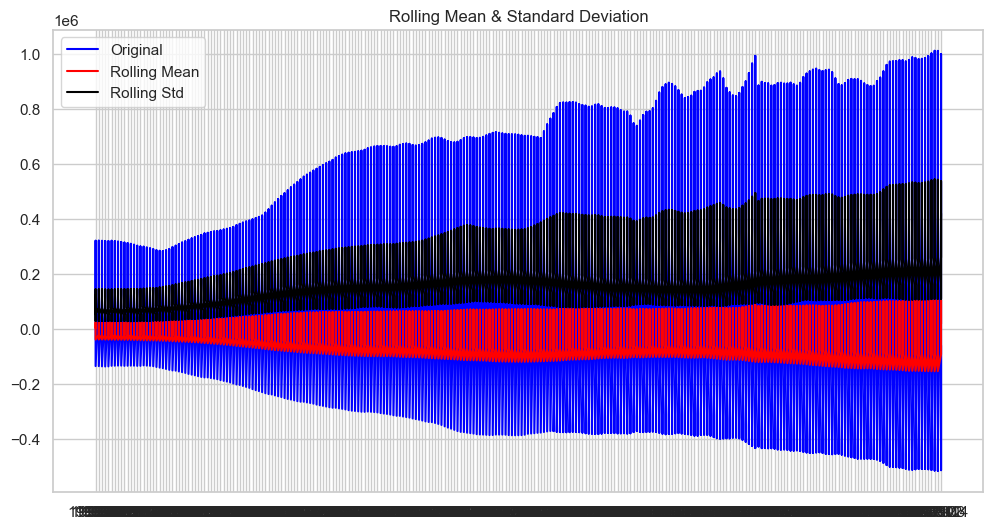

Results of Dickey-Fuller Test: 

Test Statistic                 -3471.708139
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10815.000000
Critical Value (1%)               -3.430955
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [59]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

* Test Statistic: -3471.708139

 This statistic is used to determine the stationarity of the time series data. In this case, the test statistic is highly negative.
* p-value: 0.000000

The p-value is used to determine the significance of the test statistic. A small p-value (close to 0) indicates strong evidence against the null hypothesis, suggesting that the data is stationary.

* The test statistic being much lower than all critical values further supports the conclusion of stationarity.
* Therefore, based on the Dickey-Fuller Test results, it is reasonable to conclude that the time series data is stationary, which is often a prerequisite for time series modeling and forecasting.

In [68]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Perform differencing to make the data stationary
differenced_data = ts_log_decompose.diff().dropna()

# Train-test split (e.g., using first 80% for training)
train_size = int(len(differenced_data) * 0.8)
train_data, test_data = differenced_data[:train_size], differenced_data[train_size:]

# Define and train an ARIMA model (e.g., ARIMA(1, 1, ))
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                 8683
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -121556.682
Date:                Sun, 17 Sep 2023   AIC                         243119.364
Time:                        14:23:44   BIC                         243140.571
Sample:                             0   HQIC                        243126.594
                               - 8683                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3493      0.013    -26.734      0.000      -0.375      -0.324
ma.L1         -0.9997      0.013    -78.653      0.000      -1.025      -0.975
sigma2       1.11e+11      9e-14   1.23e+24      0.000    1.11e+11    1.11e+11
===================================================================================
Ljung-Box (L1) (Q):                 195.36   Jarque-Bera (JB):               738.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.53   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  2e+38. Standard errors may be unstable.
"""

Root Mean Squared Error (RMSE): 446021.2103672069


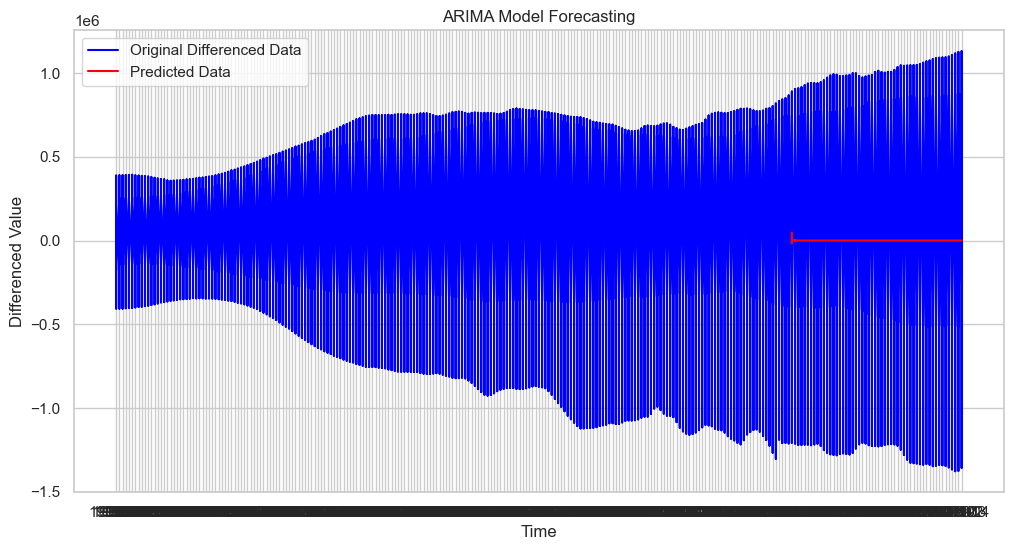

In [69]:
# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE as a model evaluation metric
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the original and predicted data
plt.figure(figsize=(12, 6))
plt.plot(differenced_data, label='Original Differenced Data', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('ARIMA Model Forecasting')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.show()

Used neural network option to improve my model, to try reduce the mean squared error.

In [72]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Data preprocessing
scaler = MinMaxScaler()
melted_df['scaled_value'] = scaler.fit_transform(melted_df['value'].values.reshape(-1, 1))

# Define the number of previous time steps to use for prediction (look-back)
look_back = 10

# Create sequences of data with corresponding target values
def create_sequences(dataset, look_back):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

X, y = create_sequences(melted_df['scaled_value'].values, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)



Epoch 1/5
48770/48770 [==============================] - 387s 8ms/step - loss: 1.1043e-04
Epoch 2/5
48770/48770 [==============================] - 367s 8ms/step - loss: 1.0966e-04
Epoch 3/5
48770/48770 [==============================] - 373s 8ms/step - loss: 1.0921e-04
Epoch 4/5
48770/48770 [==============================] - 349s 7ms/step - loss: 1.0907e-04
Epoch 5/5
48770/48770 [==============================] - 333s 7ms/step - loss: 1.0893e-04


24385/24385 [==============================] - 150s 6ms/step
Train RMSE: 201033.39663722418
Test RMSE: 330919.876815571


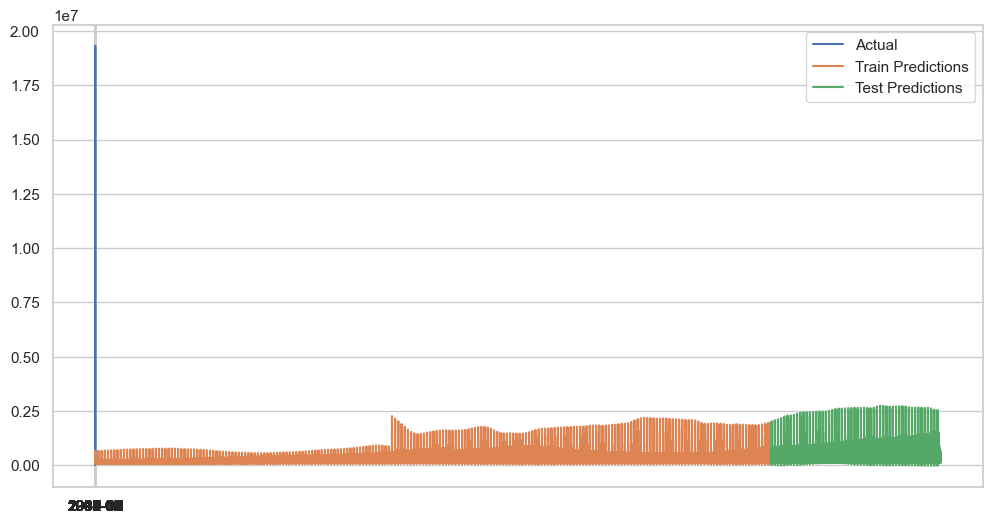

In [74]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scaling to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(melted_df['value'][look_back:train_size+look_back], train_predict))
test_rmse = np.sqrt(mean_squared_error(melted_df['value'][train_size+look_back:], test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(melted_df['value'], label='Actual')
plt.plot(np.arange(look_back, look_back+train_size), train_predict, label='Train Predictions')
plt.plot(np.arange(look_back+train_size, len(melted_df)), test_predict, label='Test Predictions')
plt.legend()
plt.show()


#### CONCLUSIONS
* Positive Long-Term Trend:  suggests that real estate has generally been a profitable investment over the years. This is a positive sign for potential real estate investors.
* Risk of Skewed Distributions:  there is a substantial variation in property values. While some areas may offer high returns, others may not be as lucrative.
* Market Variability: Real estate markets are highly localized, and different zip codes may experience varying degrees of growth or decline.
* Market Volatility: Outliers represent properties with values significantly different from the majority of properties, and their presence suggests that the market is experiencing extreme price fluctuations. 
* Investment Opportunities: While outliers may indicate increased volatility, they can also present investment opportunities. properties that are outliers in terms of high prices may represent potential high-end investments.
* Risk Assessment: High volatility can introduce uncertainty, and it's important to have risk mitigation strategies in place, such as diversifying your real estate portfolio or thoroughly researching the local market

### RECOMMENDATIONS

* Top five zip code identified during the analysis  based on size rank include:
  * RegionID, RegionName, City,	State, Metro, CountyName							
  * 84654,	60657,	Chicago,	IL,Chicago,	Cook
  * 90668,	75070,	McKinney,	TX,	Dallas-Fort Worth,	Collin
  * 91982,	77494,	Katy,	    TX,	Houston	,Harris
  * 84616,	60614,	Chicago,	IL,	Chicago,Cook
  *	93144,	79936,	El Paso,	TX,	El Paso	,El Paso	
* Investment Focus: Allocate a significant portion of the firm's investment budget to properties in the top 5 performing zip codes. These areas have a proven track record of appreciation.

* Diversification: While focusing on top-performing areas, also maintain a diversified portfolio. Don't put all investments into one region or zip code to mitigate risk.

* Market Timing: Consider market timing strategies. For example, if there are clear seasonal trends, the firm can strategically time property acquisitions and sales to maximize returns.

* Metro Area Strategy: Develop a strategy for each metro area. Some areas may be more suitable for long-term investments, while others may offer short-term gains. Tailor the approach accordingly.

* Economic Research: Continuously monitor economic indicators in the regions of interest. Be prepared to adapt investment strategies based on economic shifts.
* Pricing Strategy: Set competitive and attractive prices based on the price sensitivity of buyers in each area. Avoid overpricing, which can lead to properties sitting on the market.

* Property Management: Invest in efficient property management to maintain and enhance property values. Well-maintained properties tend to appreciate better.

* Data Analytics: Continuously collect and analyze property data to stay updated on market changes. Consider using predictive analytics to forecast future property values.